In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

dataset = pd.read_csv('data_regression_test.csv', ';')
dataset

,mag_id,rev_am,org_id,reg_id,district_id,days open,lat,lon,cluster,count,...,cat2_k2,cat3_k2,cat1_k1,cat4_k1,cat2_k1,cat3_k1,cat1_k3,cat4_k3,cat2_k3,cat3_k3
0,1,0.271793,1,1,1,7306,55.653785,37.767043,119,52,...,0.268793,0.294530,0.483861,0.204146,0.314663,0.430373,0.621938,0.290341,0.233704,0.279691
1,3,0.419363,1,1,3,7189,55.720822,37.574640,156,3,...,0.000000,0.000000,0.373951,0.195983,0.485056,0.395880,0.175030,0.130655,0.091180,0.069799
2,4,0.407493,1,1,2,7159,55.639461,37.607063,129,27,...,0.320751,0.296725,0.435382,0.313573,0.347343,0.355943,0.484975,0.313573,0.258315,0.242499
3,5,0.482371,1,1,5,7111,55.816573,37.501706,167,3,...,0.000000,0.000000,0.383203,0.940338,0.371912,0.385952,0.269041,0.940338,0.104867,0.102073
4,6,0.271793,1,1,1,7054,55.663819,37.741978,119,52,...,0.268793,0.294530,0.483861,0.204146,0.314663,0.430373,0.621938,0.290341,0.233704,0.279691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,465,0.208788,23,3,41,43,0.000000,0.000000,615,5,...,0.000000,0.000000,0.313722,0.164488,0.284259,0.267435,0.293680,0.219317,0.106869,0.094305
372,466,0.278802,1,1,5,41,0.000000,0.000000,114,8,...,0.306794,0.218728,0.423506,0.202837,0.471277,0.418954,0.264486,0.152127,0.176362,0.137783
373,467,0.208788,34,3,52,38,0.000000,0.000000,990,5,...,0.000000,0.000000,0.221983,0.052175,0.211612,0.282285,0.155851,0.052175,0.059668,0.074656
374,468,0.208788,1,1,2,37,0.000000,0.000000,465,11,...,0.394511,0.504307,0.720076,0.431662,0.523681,0.637453,0.976030,0.604326,0.364530,0.437745


**По представленным данным необходимо спрогнозировать значение переменной _rev_am_**

In [146]:
# поиск дубликатов
dataset.drop_duplicates()

,mag_id,rev_am,org_id,reg_id,district_id,days open,lat,lon,cluster,count,...,cat2_k2,cat3_k2,cat1_k1,cat4_k1,cat2_k1,cat3_k1,cat1_k3,cat4_k3,cat2_k3,cat3_k3
0,1,0.271793,1,1,1,7306,55.653785,37.767043,119,52,...,0.268793,0.294530,0.483861,0.204146,0.314663,0.430373,0.621938,0.290341,0.233704,0.279691
1,3,0.419363,1,1,3,7189,55.720822,37.574640,156,3,...,0.000000,0.000000,0.373951,0.195983,0.485056,0.395880,0.175030,0.130655,0.091180,0.069799
2,4,0.407493,1,1,2,7159,55.639461,37.607063,129,27,...,0.320751,0.296725,0.435382,0.313573,0.347343,0.355943,0.484975,0.313573,0.258315,0.242499
3,5,0.482371,1,1,5,7111,55.816573,37.501706,167,3,...,0.000000,0.000000,0.383203,0.940338,0.371912,0.385952,0.269041,0.940338,0.104867,0.102073
4,6,0.271793,1,1,1,7054,55.663819,37.741978,119,52,...,0.268793,0.294530,0.483861,0.204146,0.314663,0.430373,0.621938,0.290341,0.233704,0.279691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,465,0.208788,23,3,41,43,0.000000,0.000000,615,5,...,0.000000,0.000000,0.313722,0.164488,0.284259,0.267435,0.293680,0.219317,0.106869,0.094305
372,466,0.278802,1,1,5,41,0.000000,0.000000,114,8,...,0.306794,0.218728,0.423506,0.202837,0.471277,0.418954,0.264486,0.152127,0.176362,0.137783
373,467,0.208788,34,3,52,38,0.000000,0.000000,990,5,...,0.000000,0.000000,0.221983,0.052175,0.211612,0.282285,0.155851,0.052175,0.059668,0.074656
374,468,0.208788,1,1,2,37,0.000000,0.000000,465,11,...,0.394511,0.504307,0.720076,0.431662,0.523681,0.637453,0.976030,0.604326,0.364530,0.437745


In [149]:
# поиск пропусков 
for col in dataset.columns:
    p = np.mean(dataset[col].isnull())
    print(f" {col} - {p} %")

 mag_id - 0.0 %
 rev_am - 0.0 %
 org_id - 0.0 %
 reg_id - 0.0 %
 district_id - 0.0 %
 days open - 0.0 %
 lat - 0.0 %
 lon - 0.0 %
 cluster - 0.0 %
 count - 0.0 %
 count_am - 0.0 %
 count_k2 - 0.0 %
 count_k1 - 0.0 %
 count_k3 - 0.0 %
 rev_k2 - 0.0 %
 rev_k1 - 0.0 %
 rev_k3 - 0.0 %
 cat1_k2 - 0.0 %
 cat4_k2 - 0.0 %
 cat2_k2 - 0.0 %
 cat3_k2 - 0.0 %
 cat1_k1 - 0.0 %
 cat4_k1 - 0.0 %
 cat2_k1 - 0.0 %
 cat3_k1 - 0.0 %
 cat1_k3 - 0.0 %
 cat4_k3 - 0.0 %
 cat2_k3 - 0.0 %
 cat3_k3 - 0.0 %


## Определение коэффициентов корреляции

In [2]:
dataset.corr()['rev_am'].sort_values()
#dataset.corr()

reg_id        -0.551737
district_id   -0.451333
org_id        -0.438562
count_k3      -0.258950
mag_id        -0.227174
count         -0.198364
count_k1      -0.178702
cluster       -0.175102
count_am      -0.162170
lat           -0.017029
rev_k3         0.050950
count_k2       0.064199
cat2_k2        0.132901
rev_k2         0.165255
cat1_k2        0.176656
lon            0.179298
cat3_k2        0.188557
cat4_k3        0.208586
cat2_k1        0.237696
cat1_k1        0.246480
cat3_k1        0.252353
cat2_k3        0.257211
rev_k1         0.258238
cat1_k3        0.272159
cat4_k1        0.289222
cat3_k3        0.295177
days open      0.368643
rev_am         1.000000
cat4_k2             NaN
Name: rev_am, dtype: float64

## Диаграммы рассеяния

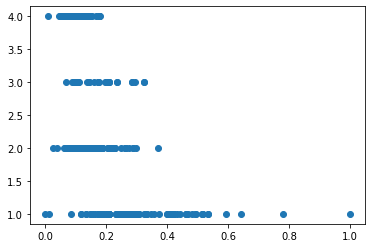

In [3]:
plt.scatter(dataset['rev_am'], dataset['reg_id'])

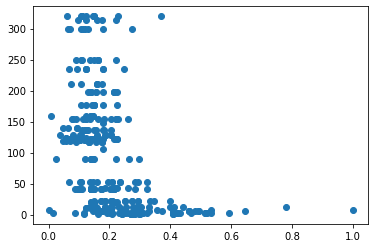

In [4]:
plt.scatter(dataset['rev_am'], dataset['district_id'])

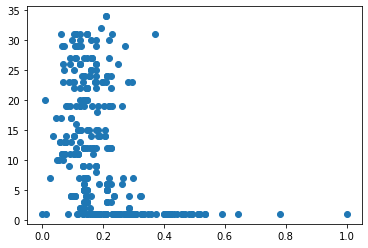

In [5]:
plt.scatter(dataset['rev_am'], dataset['org_id'])

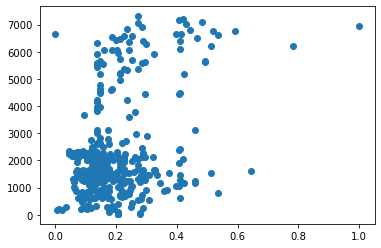

In [6]:
plt.scatter(dataset['rev_am'], dataset['days open'])

Так как коэффициент корреляции Пирсена показывает только линейную зависимость, построим графики рассеяния для каждой переменной, что бы визавльно выявить нелинейную зависимость

<ipython-input-98-7f28ef990bc8>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(name)


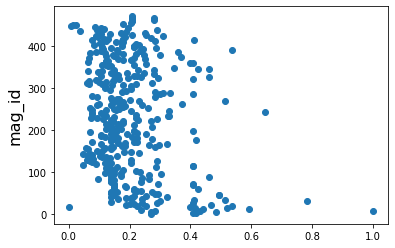

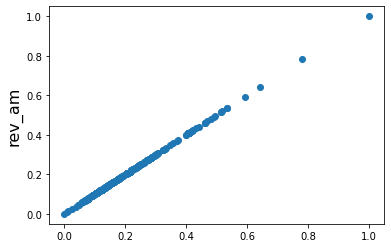

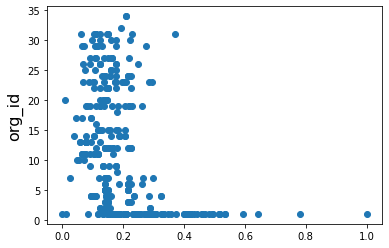

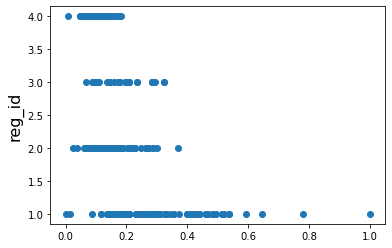

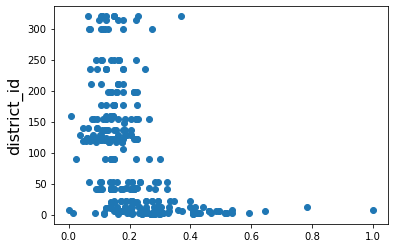

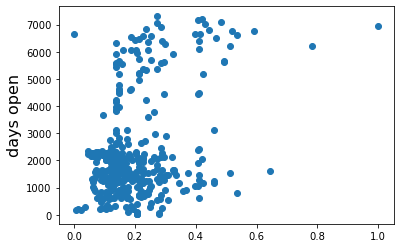

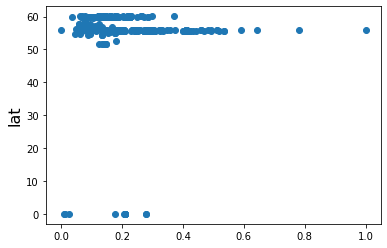

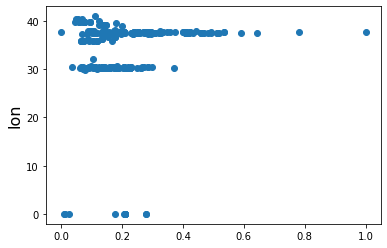

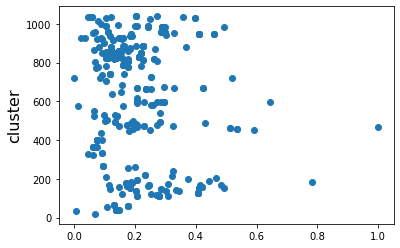

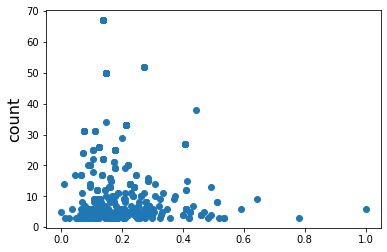

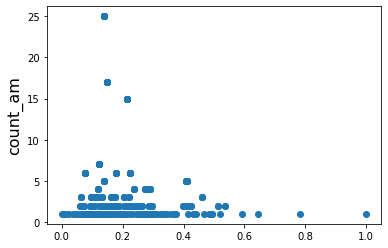

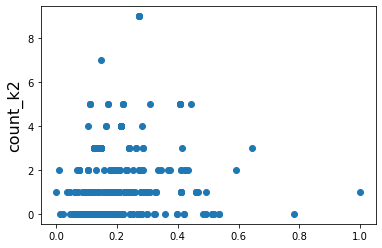

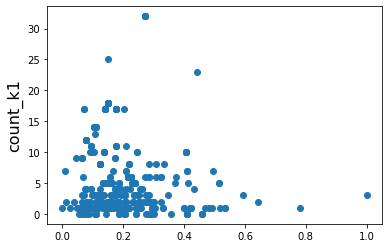

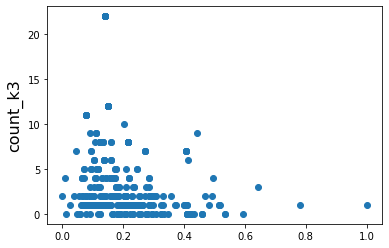

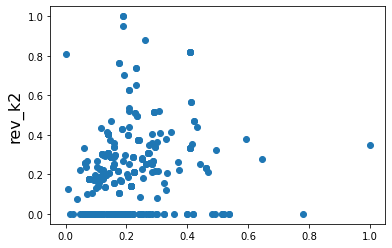

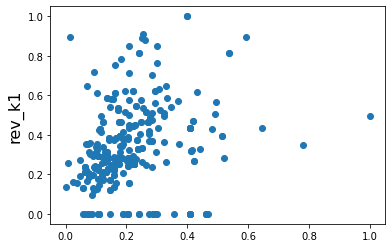

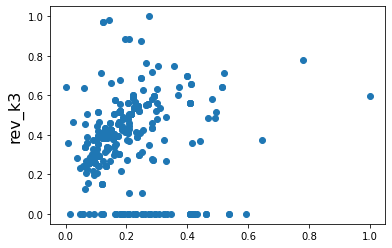

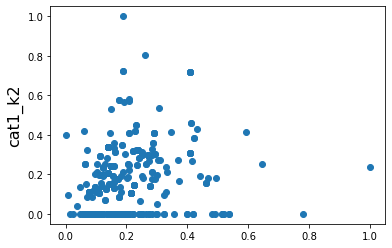

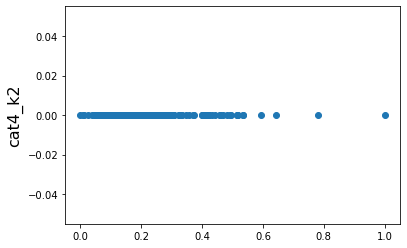

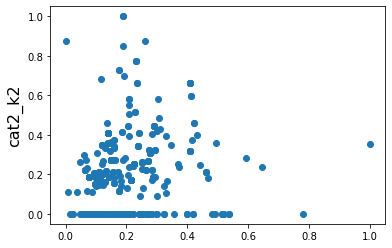

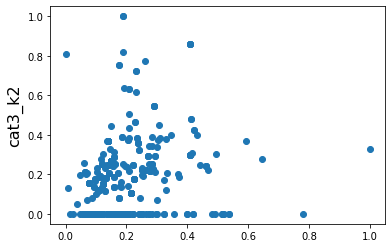

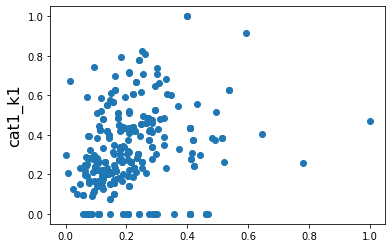

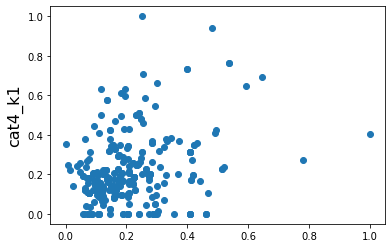

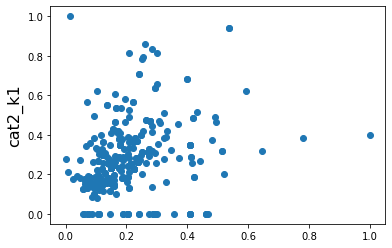

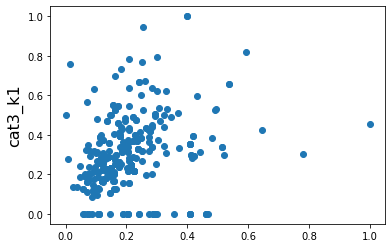

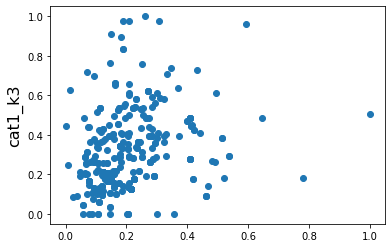

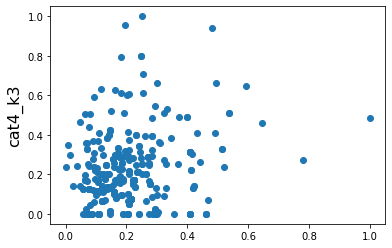

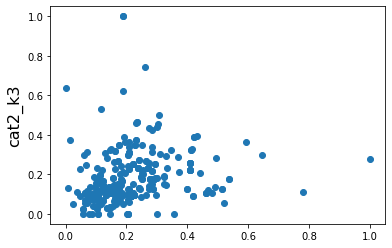

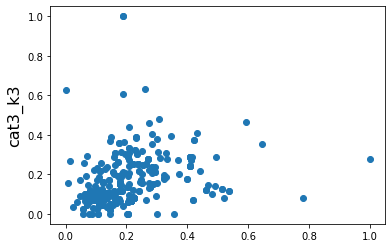

In [98]:
list = dataset.columns.tolist()
for name in list:
    fig = plt.figure(name)
    plt.ylabel(name, fontsize=16)
    plt.scatter(dataset['rev_am'], dataset[name])

## Выбор модели

#### Подготовка тестового и тренировочного наборов

In [132]:
ds = dataset[['rev_am', 'days open', 'reg_id', 'district_id', 'org_id', 'count']]
ds.head()

,rev_am,days open,reg_id,district_id,org_id,count
0,0.271793,7306,1,1,1,52
1,0.419363,7189,1,3,1,3
2,0.407493,7159,1,2,1,27
3,0.482371,7111,1,5,1,3
4,0.271793,7054,1,1,1,52


In [133]:
trg = ds[['rev_am']]
trn = ds.drop(['rev_am'], axis=1)

Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.25, random_state=1)

temp={}

#### Линейная регрессия

In [134]:
model1 = LinearRegression()
model1.fit(Xtrn,Ytrn)
r2 = r2_score(Ytest, model1.predict(Xtest))

temp[str(model1)[:str(model1).index('(')]] = r2 

#### Метод k-ближайших соседей

In [135]:
model2 = KNeighborsRegressor(n_neighbors=4)
model2.fit(Xtrn,Ytrn)
r2 = r2_score(Ytest, model2.predict(Xtest))

temp[str(model2)[:str(model2).index('(')]] = r2 

#### Рандомный лес

In [136]:
model3 = RandomForestRegressor(n_estimators=120, max_features ='sqrt')
model3.fit(Xtrn,Ytrn.values.ravel())
r2 = r2_score(Ytest, model3.predict(Xtest))

temp[str(model3)[:str(model3).index('(')]] = r2

#### Выбор лучшего метода и определение влияния каждого фактора
* Для оценки эффективности модели используется коэффициент детерминации (r2)

<AxesSubplot:title={'center':'коэффициент детерминации (r2)'}>

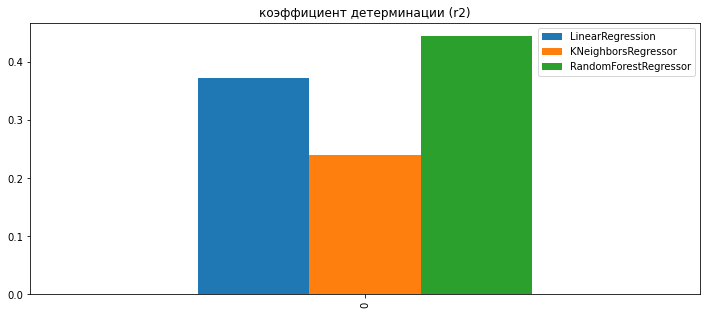

In [137]:
TestModels = pd.DataFrame()
TestModels = TestModels.append([temp])
TestModels.plot(kind='bar', title='коэффициент детерминации (r2)', figsize=(12,5))

In [138]:
model3.feature_importances_

array([0.28227479, 0.19206452, 0.20055511, 0.17199612, 0.15310947])

## Выводы

Для построения регрессии для целевой переменной **rev_am** был проведен расчет коэффициентов корреляции для определения связи между представленными данными и целевыой переменной.

Было обнаружено, что переменная **rev_am** не имеет сильной линейной корреляции ни с одной из представленых переменных. Были выявлены следующие зависимости с **rev_am**: <br>
**reg_id** - средняя положительная <br>
**district_id** - слабая положительная <br>
**org_id** - слабая положительная <br>
**days open** - слабая отрицательная <br>
Характер связи с данными переменными можно так же увидеть на графиках рассеяния.

Для наглядного определения нелинейных связей были построены графики рассеяния для каждой из представленных переменных. Наибольшую нелинейную связь с **rev_am** имеет **count** (но эта связь так же не является сильной)

После определения переменных имеющих более явную связь с целевой переменной из них был составлен новый набор данных  **ds** и разделен на тестовую и тренировочную выборки с соотношением 25:75 

Для построения моделей были использованы методы линейной регрессии, метод k-ближайших соседей и рандомный лес. Для оценки эффективности моделей использовался коэффициент детерминации. 

В результате наибольшей эффективностью обладает модель рандомный лес с коэффициентом детерминации 0,45. Наибольшее значение для прогнозирования переменной **rev_am** имеет **days open** (28%)